In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from ipywidgets import IntProgress
from IPython.display import display



np.set_printoptions(precision=4)
plt.style.use("ggplot")
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.size'] = 13
def konc():
    import os
    duration = 0.5  # second
    freq = 880  # Hz
    os.system('play --no-show-progress --null --channels 1 synth %s sine %f' % (duration, freq))


In [2]:
def mrtrt(alfa=1000, beta = 0.025, oblika = None, iteracij = 10**7):
    #from ipywidgets import IntProgress
    #from IPython.display import display
    #f = IntProgress(min=0, max=iteracij) # instantiate the bar
    #display(f) # display the bar
    if oblika == None:
        oblika = np.zeros(17)
    def perturb(potek):
        i = np.random.randint(1, 16)

        if potek[i] == 0:
            delta = -1
        elif potek[i] == -19:
            delta = 1
        else:
            delta = np.random.choice([-1, 1])
        potek[i] += delta
        dE = delta**2 - delta * (potek[i+1]-2*potek[i]+potek[i-1]-alfa)
        return potek, dE
    def energija(potek):
        return alfa*np.sum(potek) + np.sum(np.power(np.diff(potek),2))
    #mainloop:
    energijski_potek = np.empty(iteracij)
    sprejetih_potez = 0
    while sprejetih_potez < iteracij:
        if sprejetih_potez%1000 == 0:
            #f.value += 1
            print(f"Sprejetih potez: {sprejetih_potez}", end="\r")
        nova_oblika, dE = perturb(oblika)
        if dE < 0 or (np.random.uniform() > np.exp(-beta * dE)):
            oblika = nova_oblika
            energijski_potek[sprejetih_potez] = energija(oblika)
            sprejetih_potez += 1
            continue
    #plt.plot(oblika)
    #plt.ylim((-19,0))
    return oblika, np.mean(energijski_potek[:1000])


IntProgress(value=0, max=10000000)

CPU times: user 29min 31s, sys: 1min 17s, total: 30min 49s
Wall time: 28min 20s


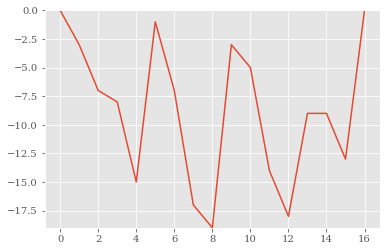

In [3]:
%%time
oblika, e = mrtrt()

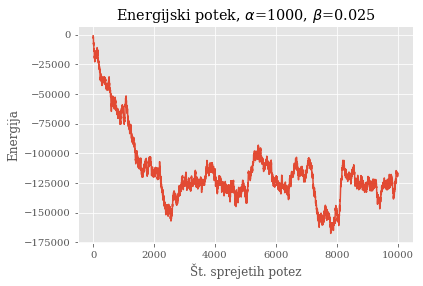

In [12]:
plt.plot(e[:10000])
plt.xlabel("Št. sprejetih potez")
plt.ylabel("Energija")
plt.title(r"Energijski potek, $\alpha$=1000, $\beta$=0.025")
plt.savefig("1-1-primer-energijskega-poteka.pdf");

In [32]:
alfe = np.array([0.001,0.01, 1, 10])
bete = np.linspace(0, 1000, 200)


podatki = pd.DataFrame(columns=alfe, index=bete)
for alfa in alfe:
    potek_po_alfi = np.empty_like(bete)
    for i, beta in enumerate(bete):
        print(f"alfa: {alfa}, Beta: {beta} od {bete[-1]}")
        _, en = mrtrt(alfa=alfa, beta=beta, iteracij=10**3)
        potek_po_alfi[i] = en
    print(f"!!!!KONČANA ALFA {alfa}!!!")
    podatki[alfa] = potek_po_alfi
podatki.to_csv("podatki-potek-po-alfah-in-betah-1e3.csv")        
        
    
    

alfa: 0.001, Beta: 0.0 od 1000.0
alfa: 0.001, Beta: 5.025125628140704 od 1000.0
alfa: 0.001, Beta: 10.050251256281408 od 1000.0
alfa: 0.001, Beta: 15.075376884422113 od 1000.0
alfa: 0.001, Beta: 20.100502512562816 od 1000.0
alfa: 0.001, Beta: 25.12562814070352 od 1000.0
alfa: 0.001, Beta: 30.150753768844226 od 1000.0
alfa: 0.001, Beta: 35.175879396984925 od 1000.0
alfa: 0.001, Beta: 40.20100502512563 od 1000.0
alfa: 0.001, Beta: 45.22613065326634 od 1000.0
alfa: 0.001, Beta: 50.25125628140704 od 1000.0
alfa: 0.001, Beta: 55.276381909547744 od 1000.0
alfa: 0.001, Beta: 60.30150753768845 od 1000.0
alfa: 0.001, Beta: 65.32663316582915 od 1000.0
alfa: 0.001, Beta: 70.35175879396985 od 1000.0
alfa: 0.001, Beta: 75.37688442211056 od 1000.0
alfa: 0.001, Beta: 80.40201005025126 od 1000.0
alfa: 0.001, Beta: 85.42713567839196 od 1000.0
alfa: 0.001, Beta: 90.45226130653268 od 1000.0
alfa: 0.001, Beta: 95.47738693467338 od 1000.0
alfa: 0.001, Beta: 100.50251256281408 od 1000.0
alfa: 0.001, Beta: 1

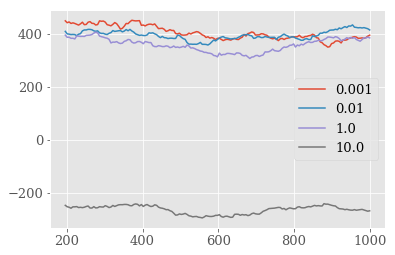

In [36]:
podatki.rolling(40).mean().plot()

In [4]:
def mrtrt(alfa=10, temperatura = 1, oblika = None, iteracij = 10**7):
    #from ipywidgets import IntProgress
    #from IPython.display import display
    #f = IntProgress(min=0, max=iteracij) # instantiate the bar
    #display(f) # display the bar
    if oblika == None:
        oblika = np.zeros(17)
    def perturb(potek):
        i = np.random.randint(1, 16)
        if potek[i] == 0:
            delta = -1
        elif potek[i] == -19:
            delta = 1
        else:
            delta = np.random.choice([-1, 1])
        potek[i] += delta
        dE = delta**2 - delta * (potek[i+1]-2*potek[i]+potek[i-1]-alfa)
        return potek, dE
    def energija(potek):
        return alfa*np.sum(potek) + np.sum(np.power(np.diff(potek),2))
    #mainloop:
    povprecna_koncna_energija = 0
    sprejetih_potez = 0
    while sprejetih_potez < iteracij:
        if sprejetih_potez%1000 == 0:
            #f.value += 1
            print(f"Sprejetih potez: {sprejetih_potez}", end="\r")
        nova_oblika, dE = perturb(oblika)
        if dE < 0 or (np.random.uniform() > np.exp(- dE/ temperatura)):
            oblika = nova_oblika
            if iteracij-sprejetih_potez <= 100:
                povprecna_koncna_energija += energija(oblika)                
            sprejetih_potez += 1
            continue
    #plt.plot(oblika)
    #plt.ylim((-19,0))
    return oblika, povprecna_koncna_energija/100


In [57]:
mrtrt()

KeyboardInterrupt: 

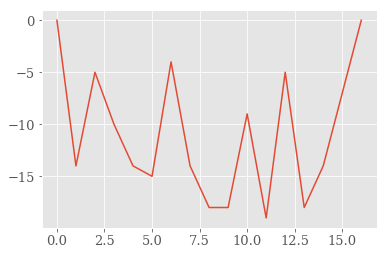

In [41]:
plt.plot(ob)

In [3]:
def mrtrt(alfa=10, temperatura = 1, oblika = None, iteracij = 10**7):
    #from ipywidgets import IntProgress
    #from IPython.display import display
    #f = IntProgress(min=0, max=iteracij) # instantiate the bar
    #display(f) # display the bar
    if oblika == None:
        oblika = np.zeros(17)
    def perturb(potek):
        i = np.random.randint(1, 16)
        if potek[i] == 0:
            delta = -1
        elif potek[i] == -19:
            delta = 1
        else:
            delta = np.random.choice([-1, 1])
        potek[i] += delta
        dE = delta**2 - delta * (potek[i+1]-2*potek[i]+potek[i-1]-alfa)
        return potek, dE
    def energija(potek):
        return alfa*np.sum(potek) + np.sum(np.power(np.diff(potek),2))
    #mainloop:
    povprecna_koncna_energija = 0
    sprejetih_potez = 0
    while sprejetih_potez < iteracij:
        if sprejetih_potez%1000 == 0:
            #f.value += 1
            print(f"Sprejetih potez: {sprejetih_potez}", end="\r")
        nova_oblika, dE = perturb(oblika)
        if dE < 0 or (np.random.uniform() < np.exp(dE/ temperatura)):
            oblika = nova_oblika
            if iteracij-sprejetih_potez <= 1000:
                povprecna_koncna_energija += energija(oblika)                
            sprejetih_potez += 1
            continue
    #plt.plot(oblika)
    #plt.ylim((-19,0))
    return oblika, povprecna_koncna_energija/1000

/home/peter/.local/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in exp


[]

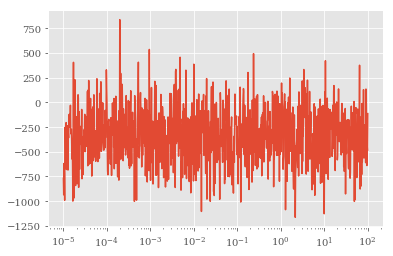

In [4]:
temperature = np.logspace(-5,2,1000)
energije = np.empty_like(temperature)
for i, temp in enumerate(temperature):
    print(i, end="\r")
    ob, en = mrtrt(temperatura = temp, iteracij=10**5)
    energije[i] = en
plt.plot(temperature, energije)
plt.semilogx()

In [6]:
alfa

NameError: name 'alfa' is not defined

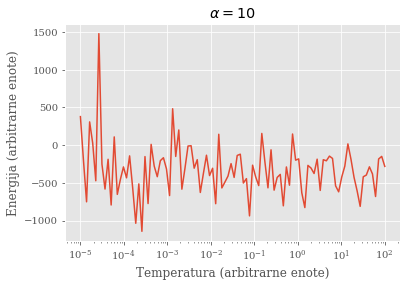

In [8]:
plt.plot(temperature, energije)
plt.xlabel("Temperatura (arbitrarne enote)")
plt.ylabel("Energija (arbitrarne enote)")
plt.title(r"$\alpha = 10$")
plt.semilogx()
plt.savefig("1-2-temperaturna_odvisnost.pdf")

-7.0


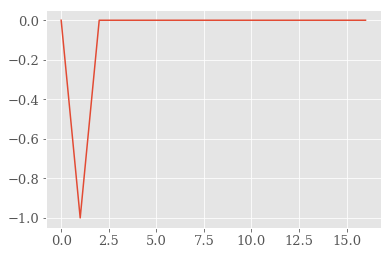

In [74]:
def perturb(potek):
    i = np.random.randint(1, 16)
    if potek[i] == 0:
        delta = -1
    elif potek[i] == -19:
        delta = 1
    else:
        delta = np.random.choice([-1, 1])
    potek[i] += delta
    dE = delta**2 - delta * (potek[i+1]-2*potek[i]+potek[i-1]-alfa)
    return potek, dE
oblika, dE = perturb([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
plt.plot(oblika)
print(dE)

In [ ]:
import time
alfa = 10000
while True:
    try:
        nova_oblika, dE = perturb(oblika)
        if dE < 0 or (np.random.uniform() < np.exp(-dE)):
            oblika = nova_oblika
        print(dE)
    except KeyboardInterrupt:
        plt.plot(oblika)
        plt.ylim((-19.1, 0.1))
        plt.yticks(np.arange(-20,1,1),np.arange(-20,1,1))
        plt.show()
        print(dE)
        plt.clf()
        plt.cla()